In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [75]:
df = pd.read_csv('raw_data/labelled_data.csv')

In [76]:
df.columns

Index(['Unnamed: 0', 'restaurant', 'item', 'ms_item', 'matched_2021',
       'new_item_2022', 'menu_item_id', 'food_category', 'item_description',
       'serving_size', 'serving_size_text', 'serving_size_unit',
       'serving_size_household', 'calories', 'total_fat', 'saturated_fat',
       'trans_fat', 'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber',
       'sugar', 'protein', 'potassium', 'notes', 'calories_text',
       'total_fat_text', 'saturated_fat_text', 'trans_fat_text',
       'cholesterol_text', 'sodium_text', 'carbohydrates_text',
       'dietary_fiber_text', 'sugar_text', 'protein_text', 'bestseller'],
      dtype='object')

In [77]:
# Basic data exploration
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (1452, 36)

First 5 rows:


,Unnamed: 0,restaurant,item,ms_item,matched_2021,new_item_2022,menu_item_id,food_category,item_description,serving_size,...,total_fat_text,saturated_fat_text,trans_fat_text,cholesterol_text,sodium_text,carbohydrates_text,dietary_fiber_text,sugar_text,protein_text,bestseller
0,0,arbys,Classic Roast Beef Meal,Classic Roast Beef,0,1,951584,Sandwiches,"Classic Roast Beef, Slow Roasted Beef",687.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,arbys,Classic Beef 'n Cheddar Meal,Classic Beef ‘n Cheddar,1,0,530,Sandwiches,"Classic Beef ‘n Cheddar, Slow Roasted Beef",221.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,arbys,Greek Gyro Meal,Greek Gyro,1,0,179878,Sandwiches,"Greek Gyro, Market Fresh",14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,arbys,Roast Beef Gyro Meal,Roast Beef Gyro,1,0,150132,Sandwiches,Roast Beef Gyro,239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,arbys,Chicken Tenders 3PC Meal,Chicken Tenders (3),1,0,10357,Entrees,"Chicken Tenders (3), Crispy Juicy Chicken",440.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [78]:
print("\nData types:")
print(df.dtypes)


Data types:
Unnamed: 0                  int64
restaurant                 object
item                       object
ms_item                    object
matched_2021                int64
new_item_2022               int64
menu_item_id                int64
food_category              object
item_description           object
serving_size              float64
serving_size_text         float64
serving_size_unit          object
serving_size_household     object
calories                    int64
total_fat                 float64
saturated_fat             float64
trans_fat                 float64
cholesterol               float64
sodium                     object
carbohydrates             float64
dietary_fiber             float64
sugar                     float64
protein                   float64
potassium                 float64
notes                     float64
calories_text             float64
total_fat_text            float64
saturated_fat_text        float64
trans_fat_text            float64
c

In [79]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Missing values per column:
serving_size               735
serving_size_text         1452
serving_size_unit          737
serving_size_household    1237
cholesterol                  8
carbohydrates                1
dietary_fiber               27
sugar                       10
protein                      1
potassium                 1285
notes                     1452
calories_text             1452
total_fat_text            1452
saturated_fat_text        1452
trans_fat_text            1452
cholesterol_text          1452
sodium_text               1452
carbohydrates_text        1452
dietary_fiber_text        1452
sugar_text                1452
protein_text              1452
dtype: int64


In [80]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

df = df.drop(['notes','calories_text','total_fat_text','saturated_fat_text','trans_fat_text','serving_size_text',
        'serving_size_household','potassium','cholesterol_text','sodium_text','carbohydrates_text','dietary_fiber_text',
        'sugar_text','protein_text'], axis=1)

In [81]:
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])



Missing values per column:
serving_size         735
serving_size_unit    737
cholesterol            8
carbohydrates          1
dietary_fiber         27
sugar                 10
protein                1
dtype: int64


In [82]:
# Convert sodium to numeric
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')

In [83]:
# Convert nutritional columns to numeric, handling non-numeric values
numeric_columns = ['calories', 'total_fat', 'saturated_fat', 'trans_fat', 
                  'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber', 
                  'sugar', 'protein', 'serving_size']


# Summary statistics for nutritional values
print("\nSummary statistics for nutritional values:")
print(df[numeric_columns].describe())


Summary statistics for nutritional values:
          calories    total_fat  saturated_fat    trans_fat  cholesterol  \
count  1452.000000  1452.000000    1452.000000  1452.000000  1444.000000   
mean    368.016529    17.444146       6.234504     0.179890    51.092105   
std     317.260128    20.041961       9.726476     0.494667    71.196451   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%     160.000000     3.000000       1.000000     0.000000     0.000000   
50%     330.000000    14.000000       4.500000     0.000000    30.000000   
75%     500.000000    24.000000       8.000000     0.000000    70.000000   
max    4920.000000   312.000000     178.000000     5.000000   750.000000   

            sodium  carbohydrates  dietary_fiber        sugar      protein  \
count   1451.00000    1451.000000    1425.000000  1442.000000  1451.000000   
mean     724.31082      38.747071       2.107368    15.398058    14.564438   
std      859.05552      32.838268    

In [84]:
# Display unique restaurants and food categories
print("\nNumber of unique restaurants:", df['restaurant'].nunique())
print("Unique restaurants:", df['restaurant'].unique())
print("\nNumber of food categories:", df['food_category'].nunique())
print("Food categories:", df['food_category'].unique())


Number of unique restaurants: 18
Unique restaurants: ['arbys' 'burger_king' 'chick-fil-a' 'chilis' 'culvers' 'dairy_queen'
 'dunkin_donuts' 'jimmy_johns' 'kfc' 'mcdonalds' 'panda_express' 'popeyes'
 'sonic' 'starbucks' 'subway' 'taco_bell' 'wendys' 'whataburger']

Number of food categories: 12
Food categories: ['Sandwiches' 'Entrees' 'Beverages' 'Fried Potatoes' 'Appetizers & Sides'
 'Desserts' 'Baked Goods' 'Burgers' 'Salads' 'Soup'
 'Toppings & Ingredients' 'Pizza']


In [85]:
# Check bestseller distribution
if 'bestseller' in df.columns:
    bestseller_counts = df['bestseller'].value_counts()
    print("\nBestseller Distribution:")
    print(bestseller_counts)

# Compare new vs. matched items
if 'new_item_2022' in df.columns and 'matched_2021' in df.columns:
    print("\nNew vs Matched Items:")
    print("New items (2022):", df['new_item_2022'].sum())
    print("Matched items (2021):", df['matched_2021'].sum())


Bestseller Distribution:
bestseller
0    1396
1      56
Name: count, dtype: int64

New vs Matched Items:
New items (2022): 335
Matched items (2021): 1117


In [86]:
#drop outlier mac and cheese tray
df = df.loc[df['calories']<4500]

In [87]:
len(df['menu_item_id'].unique())

729

should we do unique menu stat items?

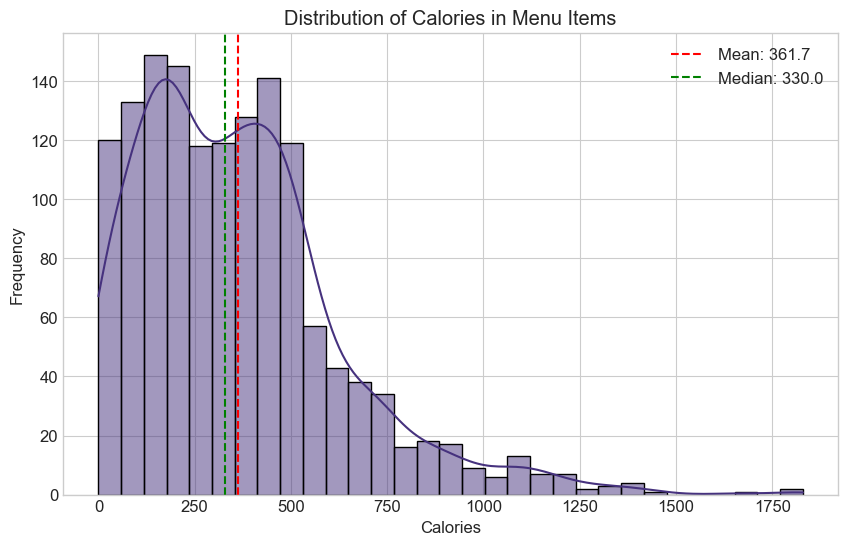

In [88]:
# Distribution of calories
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'].dropna(), kde=True)
plt.title('Distribution of Calories in Menu Items')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.axvline(df['calories'].mean(), color='red', linestyle='--', label=f'Mean: {df["calories"].mean():.1f}')
plt.axvline(df['calories'].median(), color='green', linestyle='--', label=f'Median: {df["calories"].median():.1f}')
plt.legend()
plt.show()

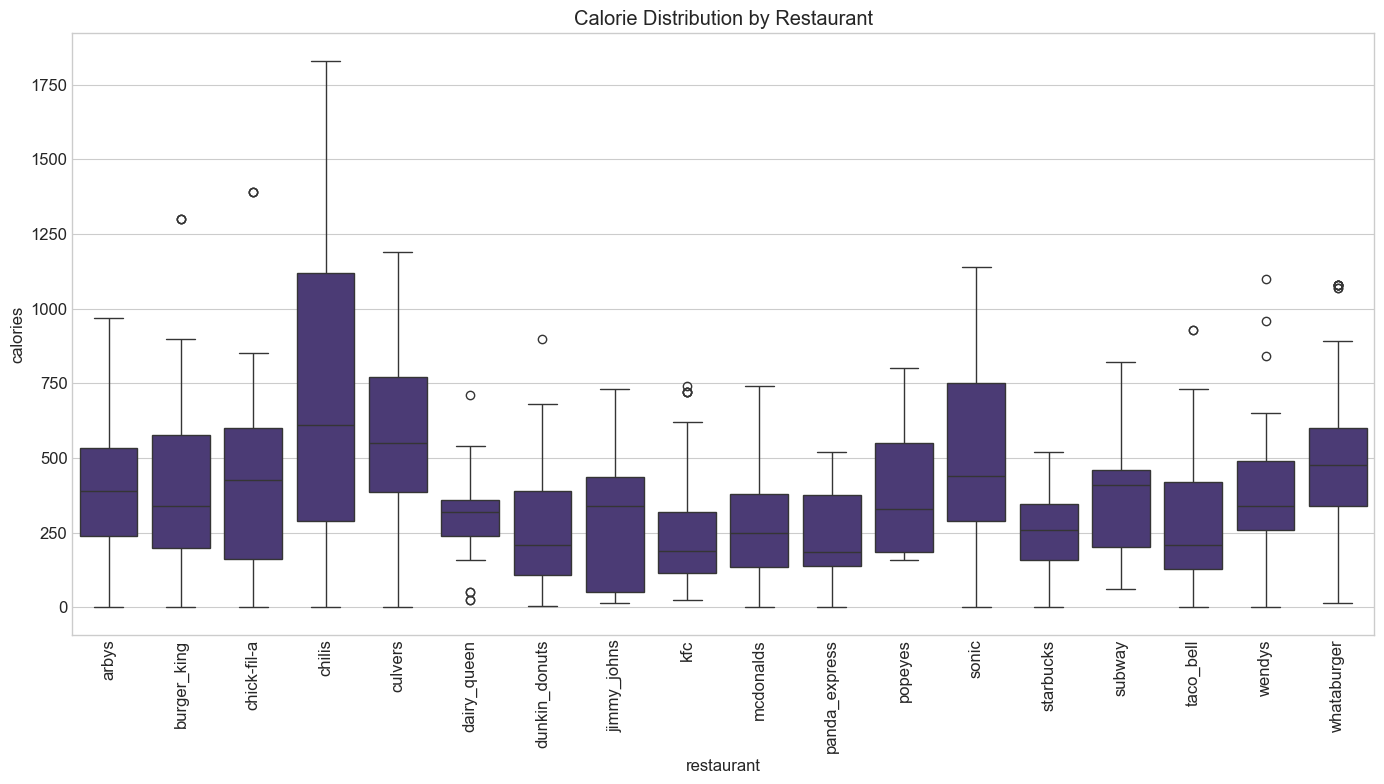

In [89]:
# Box plot of calories by restaurant
plt.figure(figsize=(14, 8))
sns.boxplot(x='restaurant', y='calories', data=df)
plt.title('Calorie Distribution by Restaurant')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

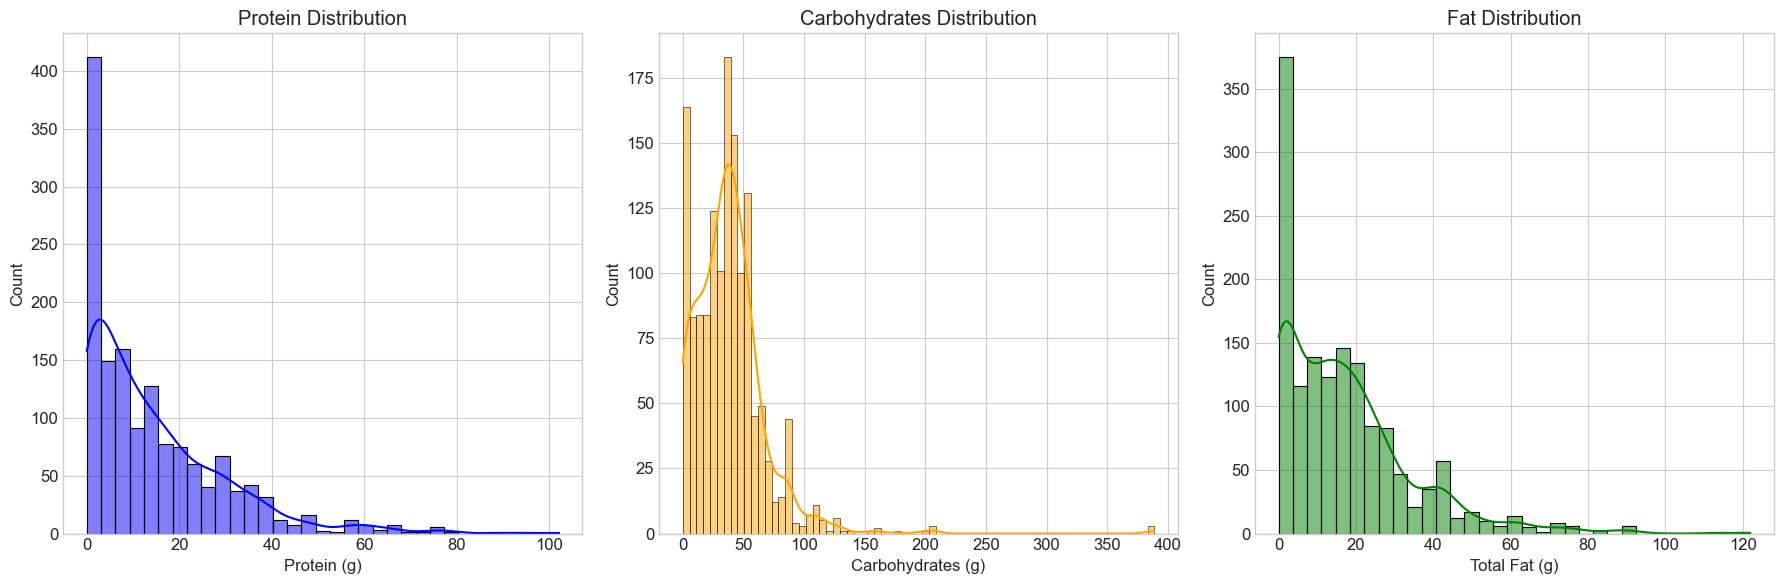

In [90]:
# Distribution of macronutrients
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['protein'].dropna(), kde=True, color='blue')
plt.title('Protein Distribution')
plt.xlabel('Protein (g)')

plt.subplot(1, 3, 2)
sns.histplot(df['carbohydrates'].dropna(), kde=True, color='orange')
plt.title('Carbohydrates Distribution')
plt.xlabel('Carbohydrates (g)')

plt.subplot(1, 3, 3)
sns.histplot(df['total_fat'].dropna(), kde=True, color='green')
plt.title('Fat Distribution')
plt.xlabel('Total Fat (g)')

plt.tight_layout()
plt.show()

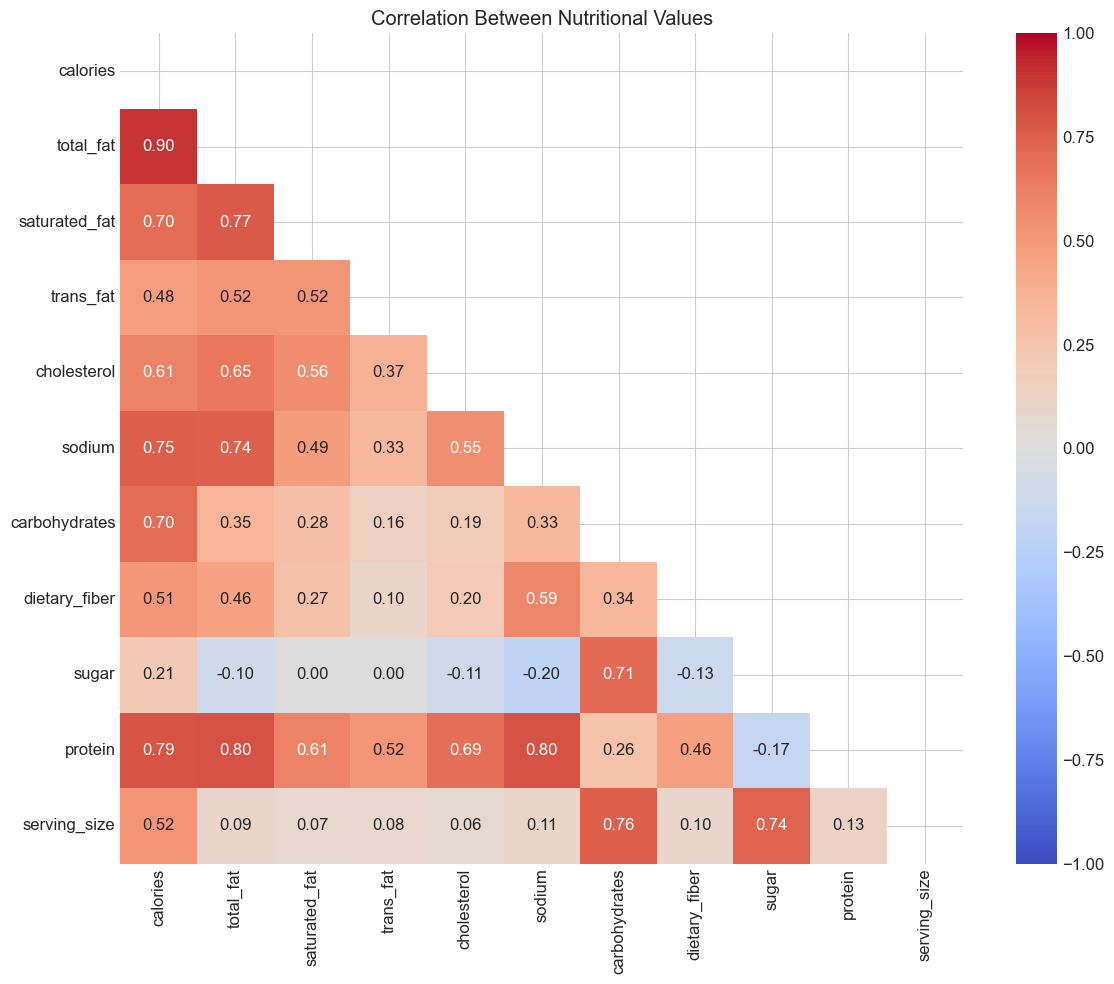

In [91]:
# Correlation heatmap of nutritional values
plt.figure(figsize=(12, 10))
corr = df[numeric_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Nutritional Values')
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

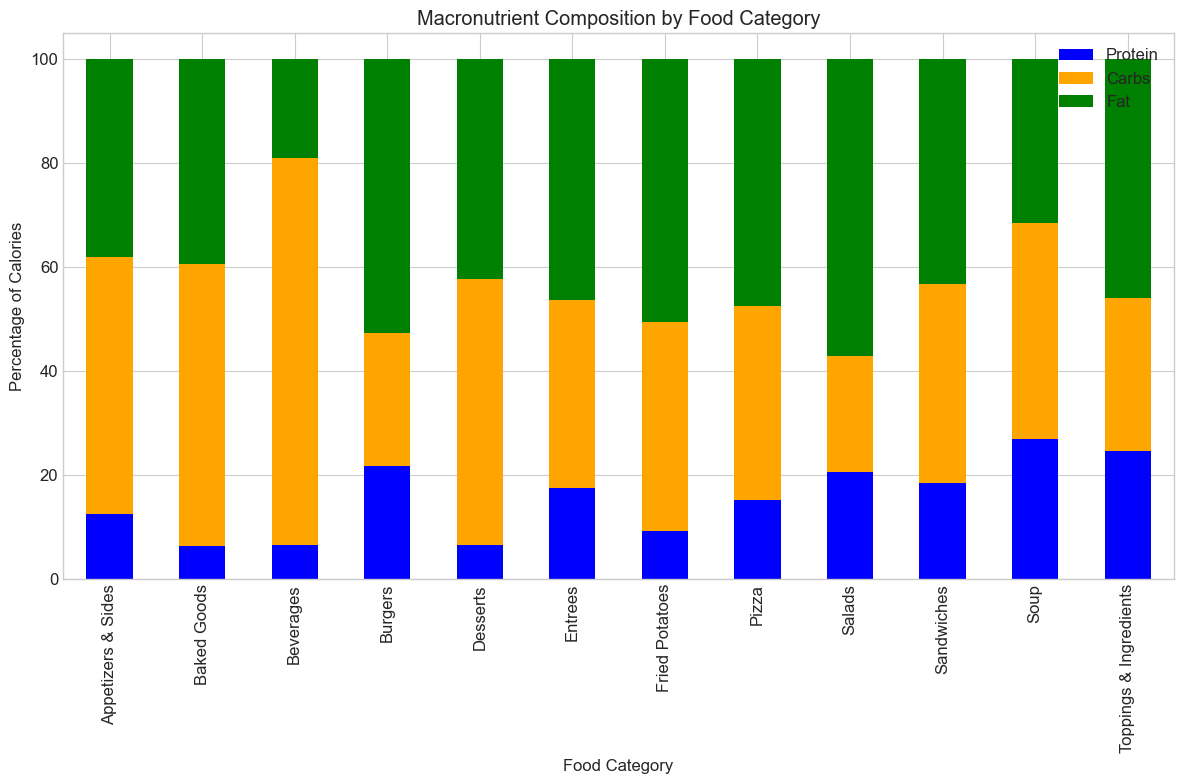

In [92]:
# Macronutrient composition by food category
# Calculate macronutrient percentages (assuming 4 calories per gram for protein and carbs, 9 for fat)
df['protein_calories'] = df['protein'] * 4
df['carbs_calories'] = df['carbohydrates'] * 4
df['fat_calories'] = df['total_fat'] * 9

# Group by food category and calculate mean percentages
category_macros = df.groupby('food_category')[['protein_calories', 'carbs_calories', 'fat_calories']].mean()
category_macros['total'] = category_macros.sum(axis=1)
category_macros['protein_pct'] = (category_macros['protein_calories'] / category_macros['total']) * 100
category_macros['carbs_pct'] = (category_macros['carbs_calories'] / category_macros['total']) * 100
category_macros['fat_pct'] = (category_macros['fat_calories'] / category_macros['total']) * 100

# Plot stacked bar chart
plt.figure(figsize=(14, 8))
category_macros[['protein_pct', 'carbs_pct', 'fat_pct']].plot(kind='bar', stacked=True, 
                                                            color=['blue', 'orange', 'green'])
plt.title('Macronutrient Composition by Food Category')
plt.xlabel('Food Category')
plt.ylabel('Percentage of Calories')
plt.xticks(rotation=90)
plt.legend(['Protein', 'Carbs', 'Fat'])
plt.tight_layout()
plt.show()

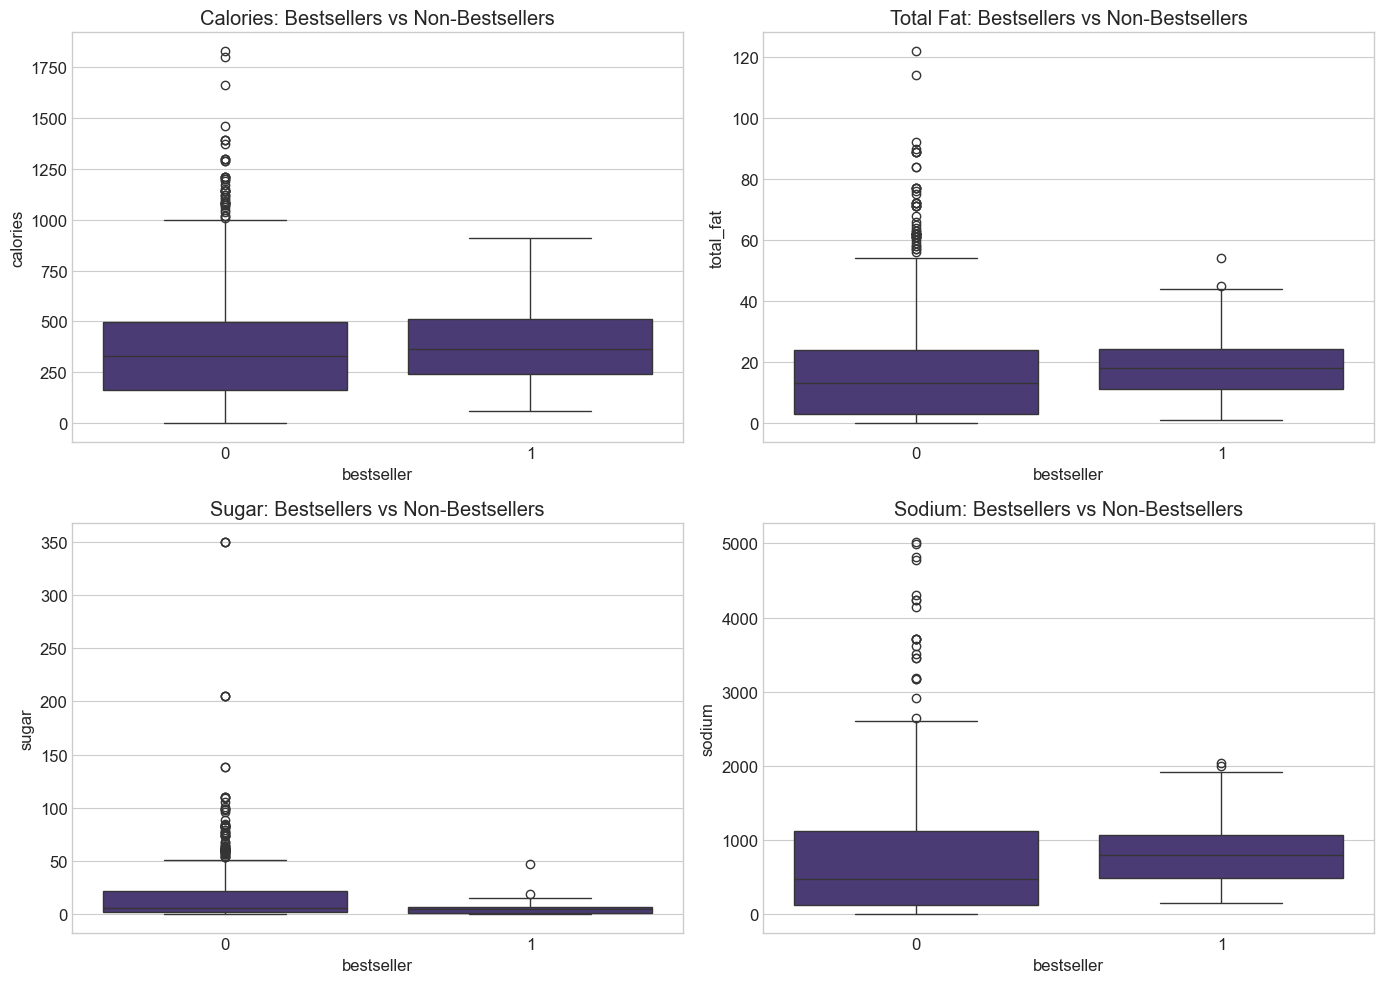

In [93]:
#analyze bestsellers
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='bestseller', y='calories', data=df)
plt.title('Calories: Bestsellers vs Non-Bestsellers')

plt.subplot(2, 2, 2)
sns.boxplot(x='bestseller', y='total_fat', data=df)
plt.title('Total Fat: Bestsellers vs Non-Bestsellers')

plt.subplot(2, 2, 3)
sns.boxplot(x='bestseller', y='sugar', data=df)
plt.title('Sugar: Bestsellers vs Non-Bestsellers')

plt.subplot(2, 2, 4)
sns.boxplot(x='bestseller', y='sodium', data=df)
plt.title('Sodium: Bestsellers vs Non-Bestsellers')

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

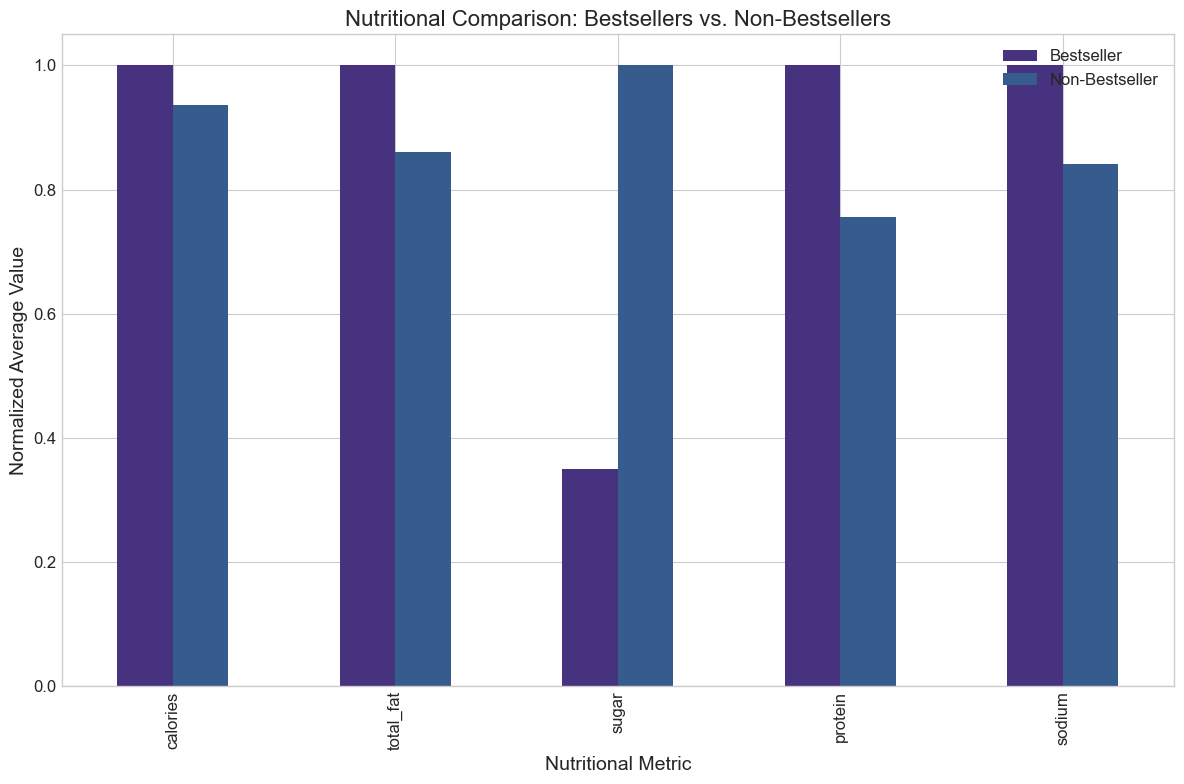

In [94]:
# 6. Compare nutritional content of bestsellers vs non-bestsellers

plt.figure(figsize=(14, 8))
nutrition_metrics = ['calories', 'total_fat', 'sugar', 'protein', 'sodium']

# Create a comparison dataframe
bestseller_comparison = pd.DataFrame({
    'Bestseller': df[df['bestseller'] == True][nutrition_metrics].mean(),
    'Non-Bestseller': df[df['bestseller'] == False][nutrition_metrics].mean()
})

# Normalize the values for better comparison - this divides by average nutrional values for all bestselling / all non-bestselling items
normalized = bestseller_comparison.div(bestseller_comparison.max(axis=1), axis=0)
normalized.plot(kind='bar')
plt.title('Nutritional Comparison: Bestsellers vs. Non-Bestsellers', fontsize=16)
plt.xlabel('Nutritional Metric', fontsize=14)
plt.ylabel('Normalized Average Value', fontsize=14)
plt.tight_layout()
plt.show()

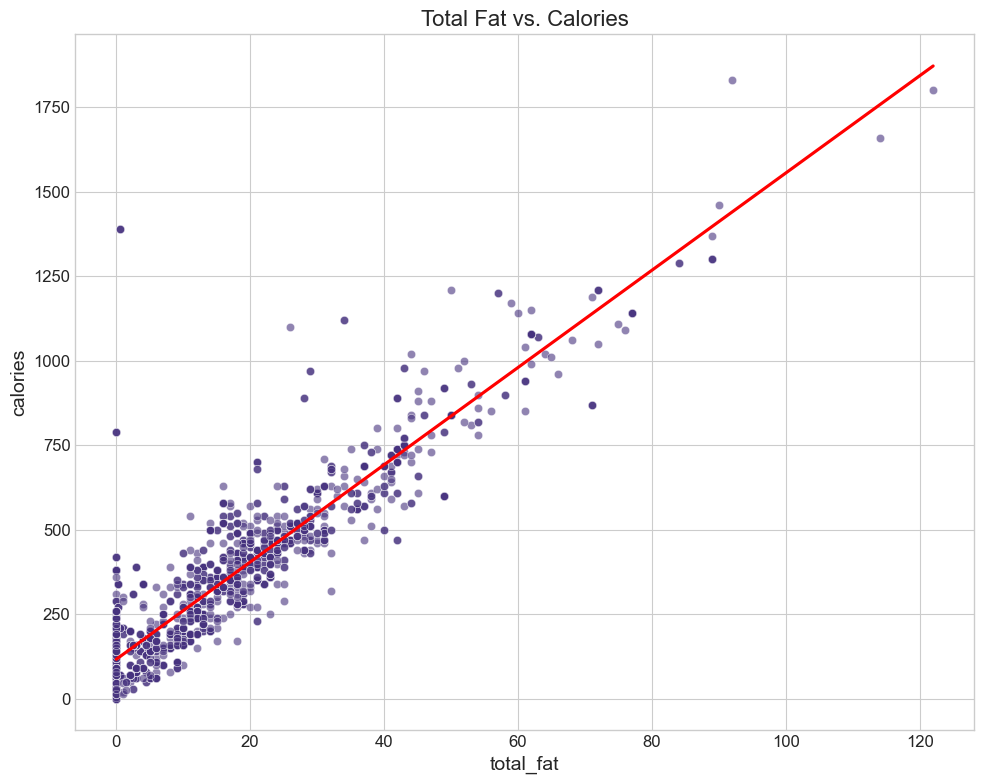

In [95]:
# 8. Fat vs. Calorie content - are they proportional?
plt.figure(figsize=(10, 8))
sns.scatterplot(x='total_fat', y='calories', data=df, alpha=0.6, 
                hue='food_category' if df['food_category'].nunique() <= 10 else None)
plt.title('Total Fat vs. Calories', fontsize=16)
plt.xlabel('Total Fat (g)', fontsize=14)
plt.ylabel('Calories', fontsize=14)
# Add a regression line
sns.regplot(x='total_fat', y='calories', data=df, scatter=False, ci=None, color='red')
if df['food_category'].nunique() <= 10:
    plt.legend(title='Food Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

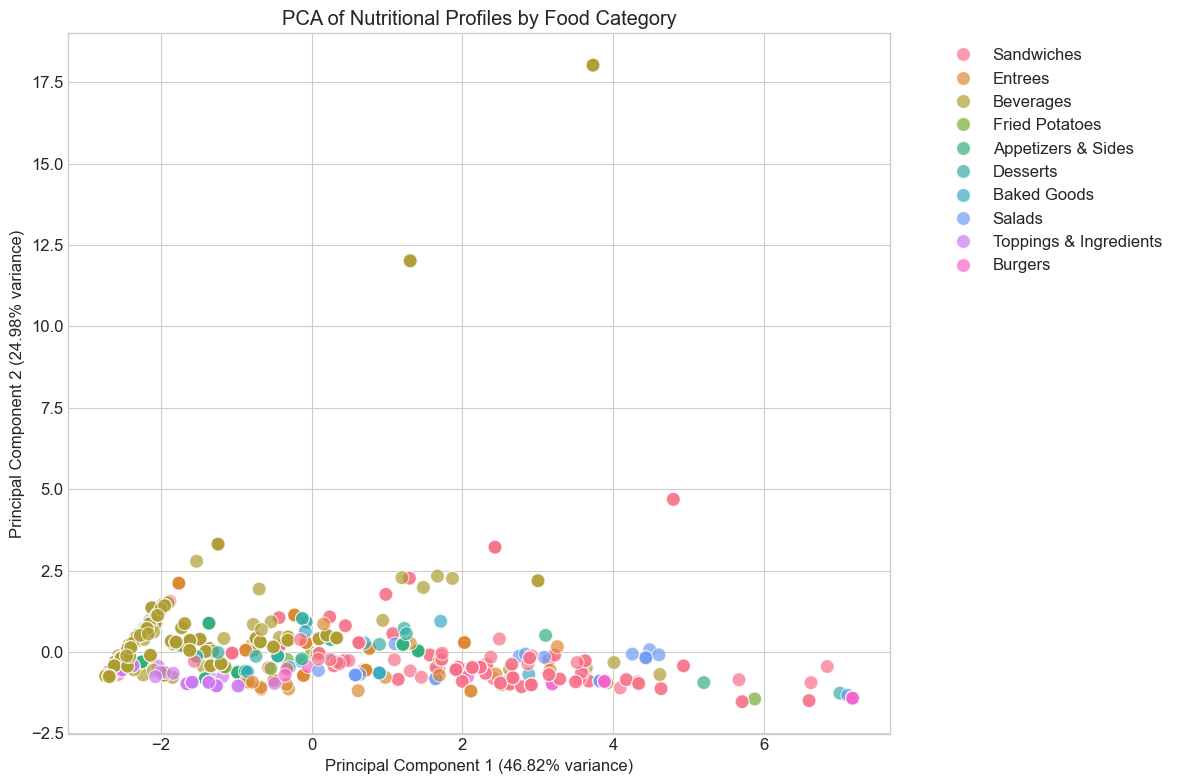


PCA Explained Variance Ratio: [0.46819605 0.24983436]
Total Variance Explained: 0.7180304092953119


In [96]:
# PCA to visualize nutritional profiles
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
pca_features = [col for col in numeric_columns if col in df.columns]
df_pca = df[pca_features].dropna()

if len(df_pca) > 10:  # Only proceed if we have enough data
    # Standardize the data
    X = StandardScaler().fit_transform(df_pca)
    
    # Apply PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X)
    
    # Create DataFrame with principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    
    # Add food category for coloring
    pca_df['food_category'] = df.loc[df_pca.index, 'food_category'].values
    
    # Plot PCA results
    plt.figure(figsize=(12, 8))
    
    # Limit to top 10 categories if there are many
    top_categories = df['food_category'].value_counts().nlargest(10).index
    plot_df = pca_df[pca_df['food_category'].isin(top_categories)]
    
    ax = sns.scatterplot(x='PC1', y='PC2', hue='food_category', data=plot_df, s=100, alpha=0.7)
    plt.title('PCA of Nutritional Profiles by Food Category')
    plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Print explained variance
    print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)
    print("Total Variance Explained:", sum(pca.explained_variance_ratio_))

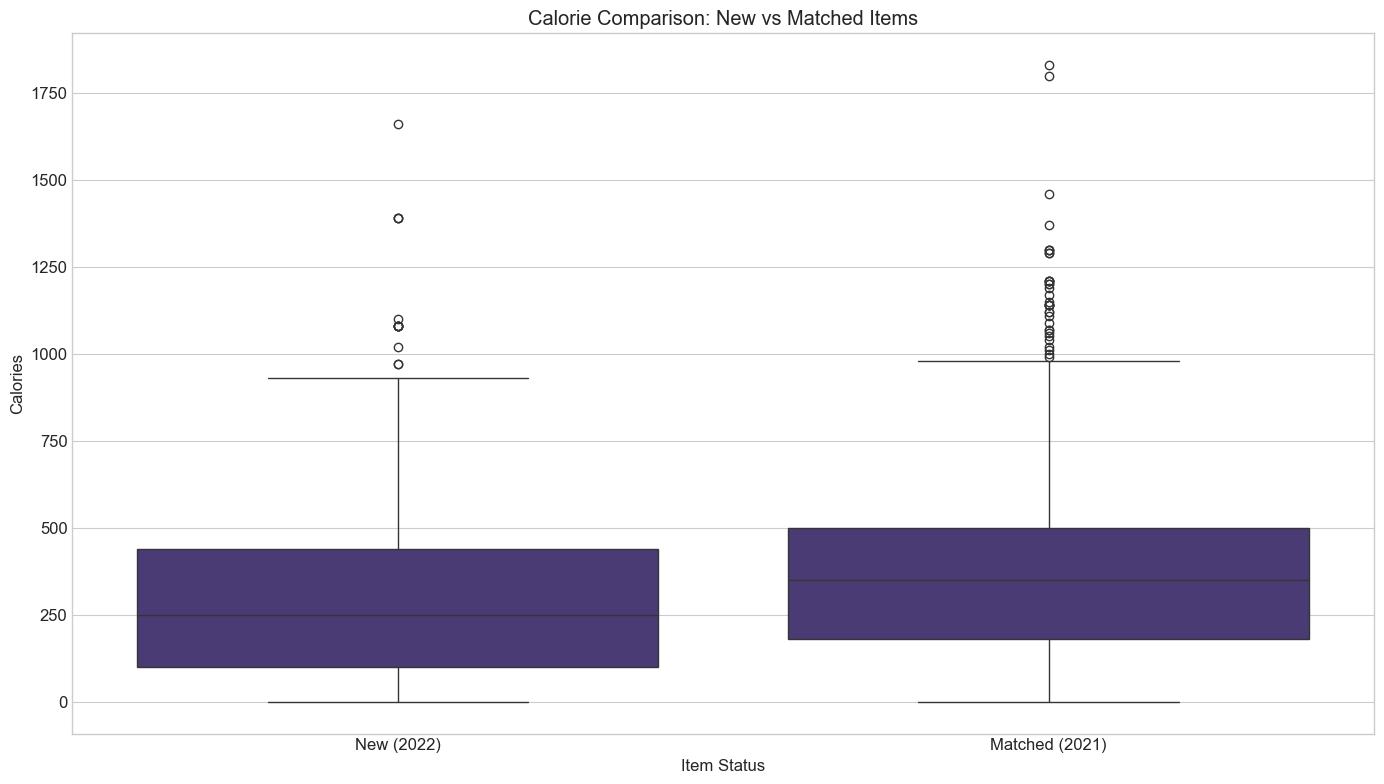

In [97]:
# Analysis of new items vs matched items
if 'new_item_2022' in df.columns and 'matched_2021' in df.columns:
    # Create a column that indicates item status
    df['item_status'] = np.nan
    df.loc[df['new_item_2022'] == True, 'item_status'] = 'New (2022)'
    df.loc[df['matched_2021'] == True, 'item_status'] = 'Matched (2021)'
    
    # Compare nutritional profiles
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='item_status', y='calories', data=df.dropna(subset=['item_status']))
    plt.title('Calorie Comparison: New vs Matched Items')
    plt.xlabel('Item Status')
    plt.ylabel('Calories')
    plt.tight_layout()
    plt.show()

<Figure size 1400x1000 with 0 Axes>

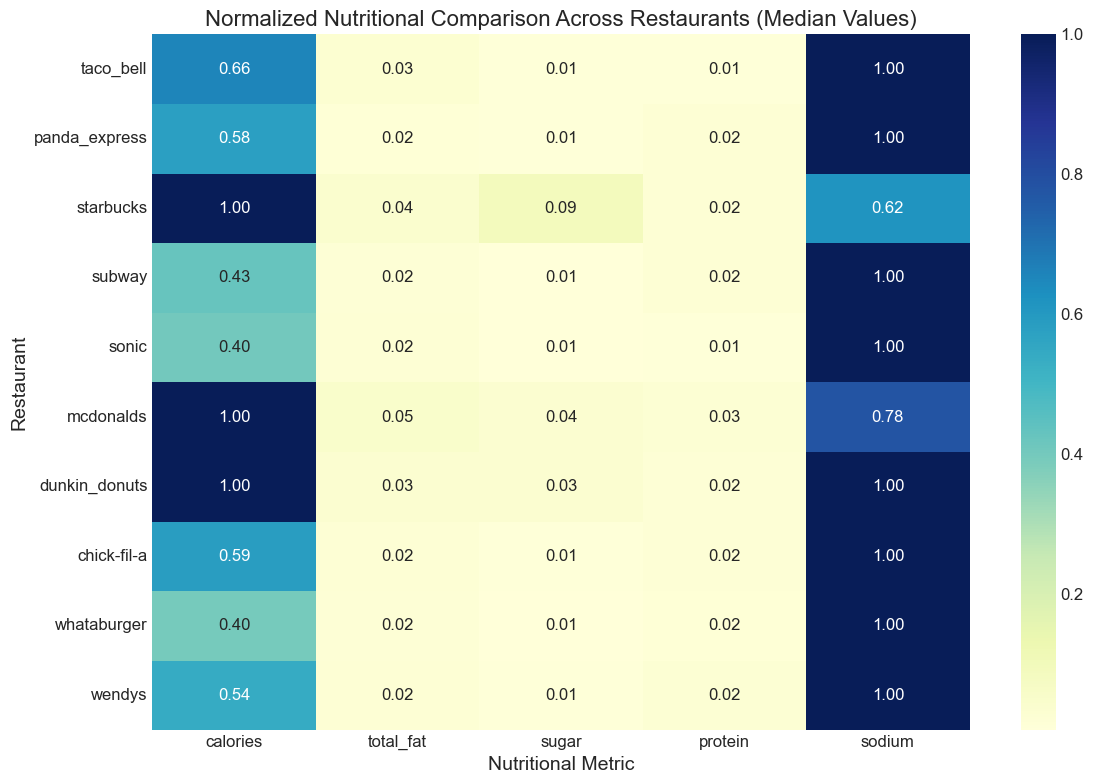


Restaurant Menu Diversity Analysis:
               Total Items  Unique Categories  Avg Calories  \
restaurant                                                    
taco_bell              152                  8    261.677632   
panda_express          122                  4    225.819672   
starbucks              119                  6    245.000000   
subway                 118                  6    358.389831   
sonic                  116                  8    487.413793   
mcdonalds              114                  7    273.245614   
dunkin_donuts           91                  5    251.923077   
chick-fil-a             86                  9    414.825581   
whataburger             80                 10    500.250000   
wendys                  76                  9    365.394737   

               Healthier Options  Category Diversity Ratio  \
restaurant                                                   
taco_bell                    107                  0.052632   
panda_express       

<Figure size 1400x800 with 0 Axes>

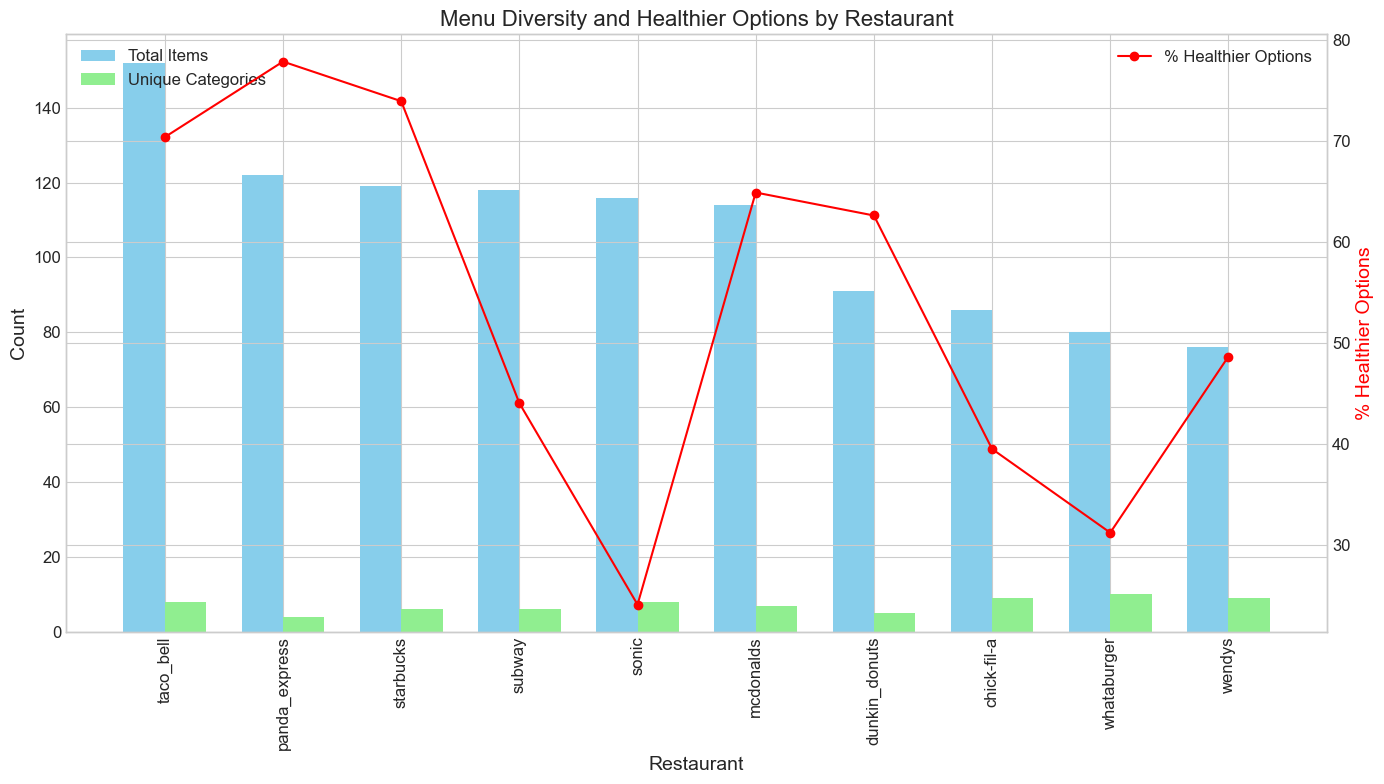

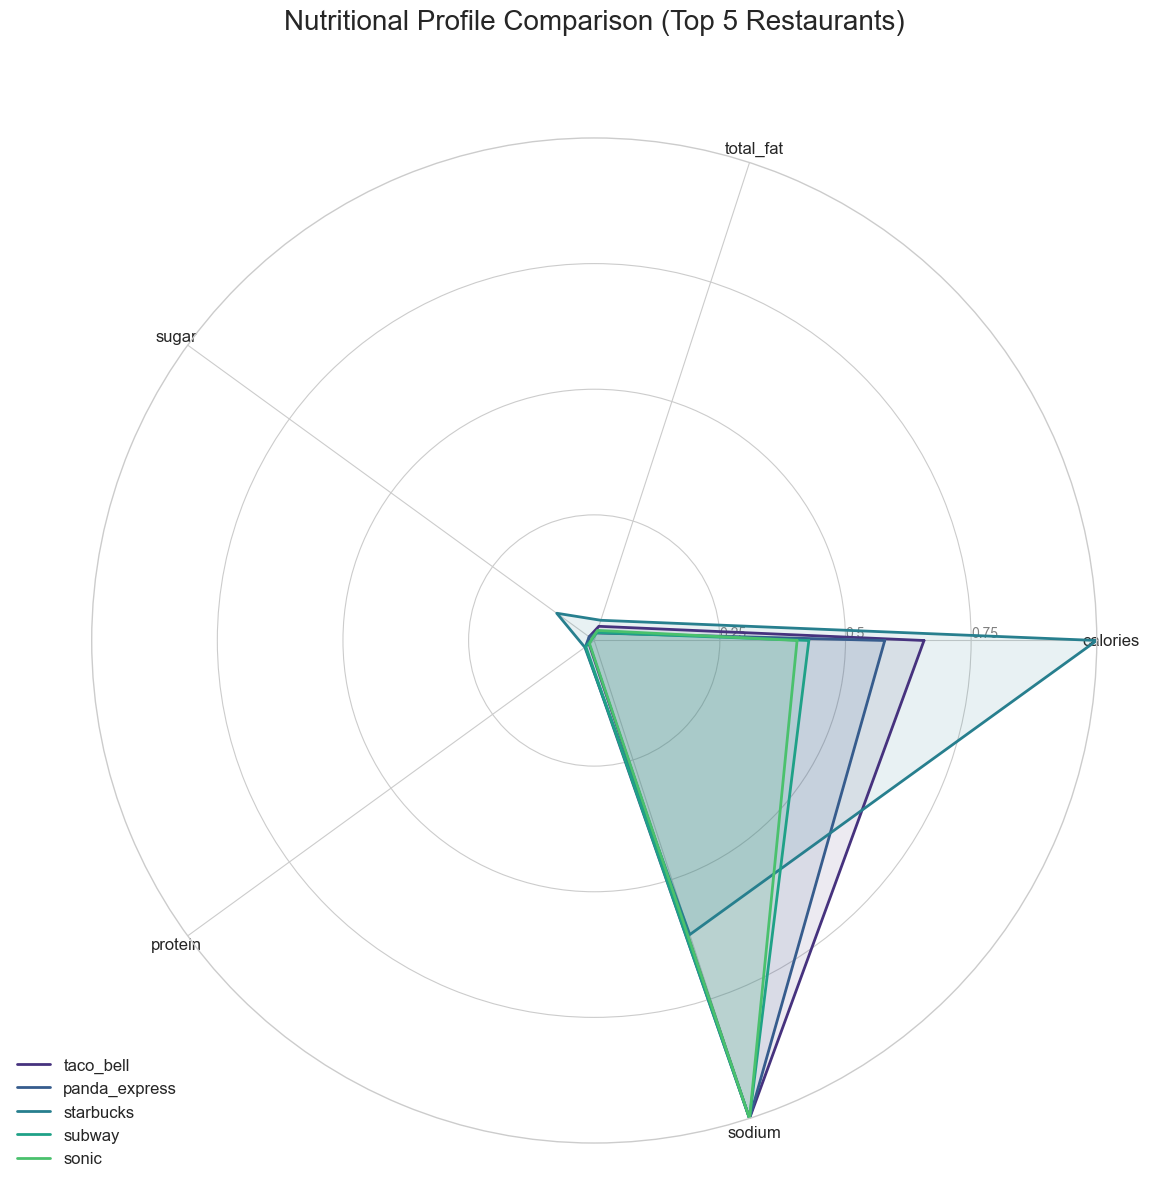

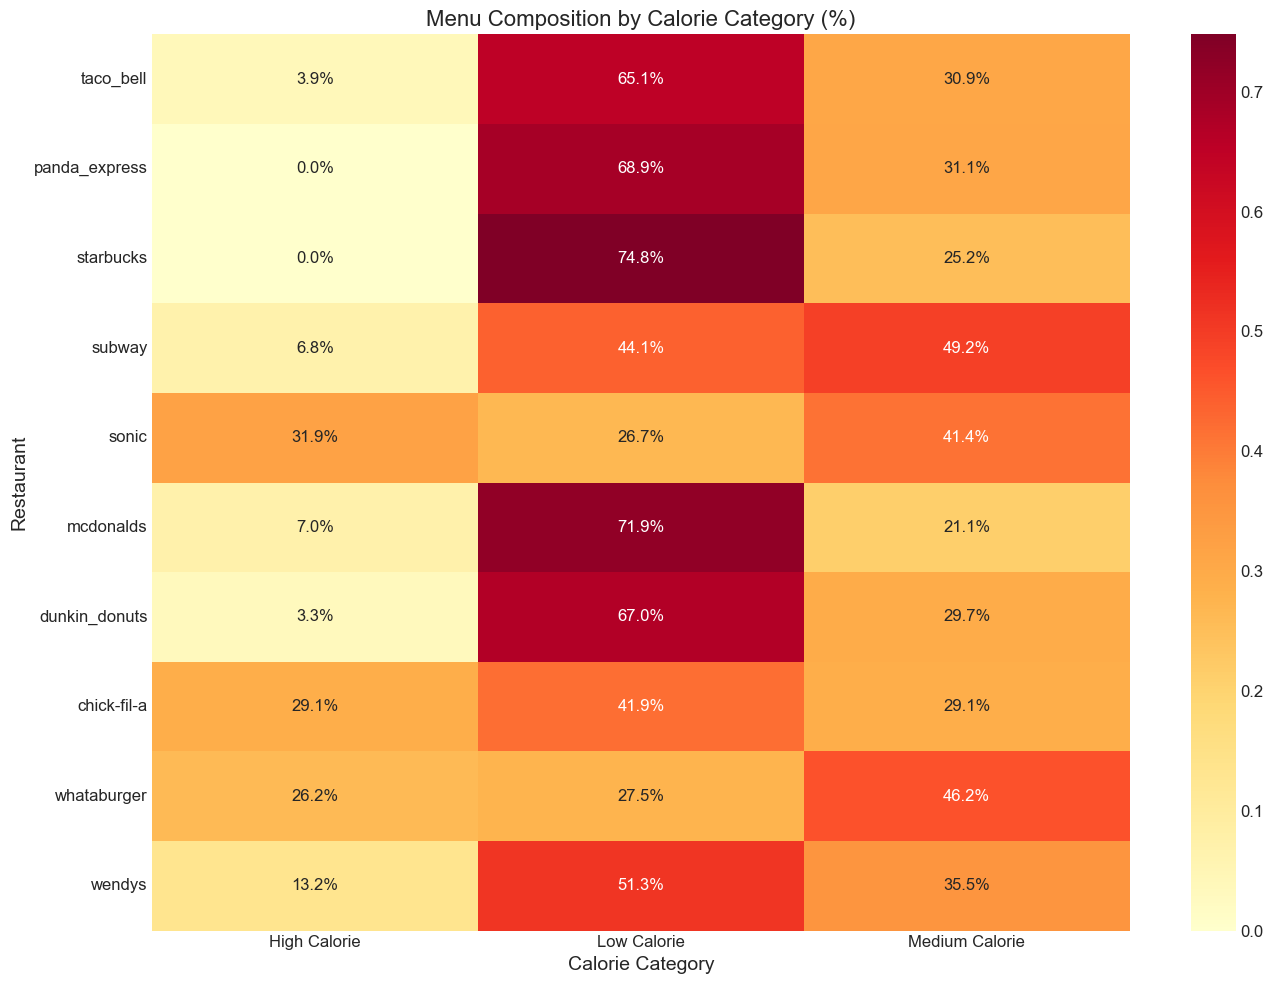

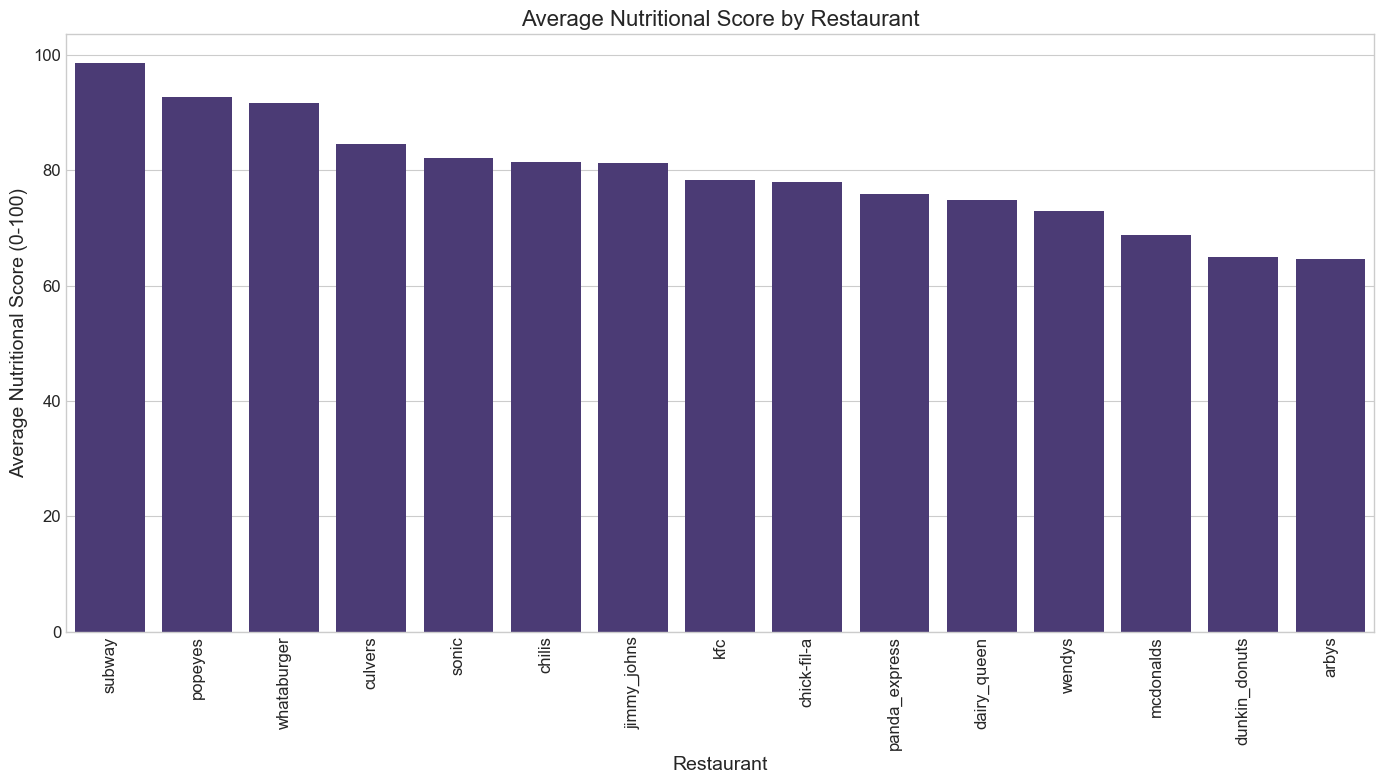


=== Restaurant Comparison Insights ===
1. Healthiest menu overall:  subway
2. Most diverse menu:  popeyes
3. Highest percentage of healthy options:  panda_express


In [98]:
# FOCUS: Restaurant Comparison Analysis
# =====================================

# Get top restaurants by number of menu items
top_restaurants = df['restaurant'].value_counts().nlargest(10).index.tolist()
restaurant_df = df[df['restaurant'].isin(top_restaurants)]

# 1. Median nutritional values by restaurant
plt.figure(figsize=(14, 10))
nutrition_metrics = ['calories', 'total_fat', 'sugar', 'protein', 'sodium']

# Create a comparison dataframe using median values (less affected by outliers)
restaurant_comparison = pd.DataFrame()

for restaurant in top_restaurants:
    restaurant_data = df[df['restaurant'] == restaurant][nutrition_metrics].median()
    restaurant_comparison[restaurant] = restaurant_data

# Normalize for better comparison
normalized = restaurant_comparison.div(restaurant_comparison.max())
normalized = normalized.T  # Transpose for better plotting

# Create a heatmap of normalized nutritional values
plt.figure(figsize=(12, 8))
sns.heatmap(normalized, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Normalized Nutritional Comparison Across Restaurants (Median Values)', fontsize=16)
plt.ylabel('Restaurant', fontsize=14)
plt.xlabel('Nutritional Metric', fontsize=14)
plt.tight_layout()
plt.show()

# 2. Menu diversity analysis
# Count the number of food categories per restaurant
restaurant_diversity = pd.DataFrame({
    'Total Items': df.groupby('restaurant').size(),
    'Unique Categories': df.groupby('restaurant')['food_category'].nunique(),
    'Avg Calories': df.groupby('restaurant')['calories'].mean(),
    'Healthier Options': df.groupby('restaurant').apply(
        lambda x: ((x['calories'] < 500) & (x['total_fat'] < 15)).sum()
    )
})

# Calculate category diversity ratio
restaurant_diversity['Category Diversity Ratio'] = (
    restaurant_diversity['Unique Categories'] / restaurant_diversity['Total Items']
)

# Calculate percentage of healthier options
restaurant_diversity['Percentage Healthier Options'] = (
    restaurant_diversity['Healthier Options'] / restaurant_diversity['Total Items'] * 100
)

# Display top restaurants by this analysis
print("\nRestaurant Menu Diversity Analysis:")
print(restaurant_diversity.sort_values('Total Items', ascending=False).head(10))

# Visualize menu diversity
plt.figure(figsize=(14, 8))
top10_diverse = restaurant_diversity.sort_values('Total Items', ascending=False).head(10)
x = np.arange(len(top10_diverse.index))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, top10_diverse['Total Items'], width, label='Total Items', color='skyblue')
bars2 = ax1.bar(x + width/2, top10_diverse['Unique Categories'], width, label='Unique Categories', color='lightgreen')
line = ax2.plot(x, top10_diverse['Percentage Healthier Options'], 'ro-', label='% Healthier Options')

ax1.set_xlabel('Restaurant', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax2.set_ylabel('% Healthier Options', fontsize=14, color='red')
ax1.set_title('Menu Diversity and Healthier Options by Restaurant', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(top10_diverse.index, rotation=90)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 3. Nutritional balance analysis across restaurants
# Create a radar chart for top 5 restaurants

from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_chart(df, categories, restaurants, title):
    # Number of variables
    N = len(categories)
    
    # Create angles for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Draw y-axis labels
    ax.set_rlabel_position(0)
    plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.5", "0.75"], color="grey", size=10)
    plt.ylim(0, 1)
    
    # Plot each restaurant
    for i, restaurant in enumerate(restaurants):
        values = df.loc[restaurant].values.flatten().tolist()
        values += values[:1]  # Close the loop
        
        # Plot values
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=restaurant)
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(title, size=20, y=1.1)
    
    return fig, ax

# Prepare data for radar chart
top5_restaurants = restaurant_comparison.columns[:5]
radar_categories = nutrition_metrics
radar_data = normalized.loc[top5_restaurants]

# Create and show the radar chart
fig, ax = radar_chart(radar_data, radar_categories, top5_restaurants, 
                     'Nutritional Profile Comparison (Top 5 Restaurants)')
plt.tight_layout()
plt.show()

# 4. Menu item classification by nutritional content
# This helps to understand the distribution of different types of menu items

# Create nutritional categories
def categorize_item(row):
    if pd.isna(row['calories']):
        return 'Unknown'
    elif row['calories'] < 350:
        return 'Low Calorie'
    elif row['calories'] < 600:
        return 'Medium Calorie'
    else:
        return 'High Calorie'

def protein_category(row):
    if pd.isna(row['protein']):
        return 'Unknown'
    elif row['protein'] < 10:
        return 'Low Protein'
    elif row['protein'] < 20:
        return 'Medium Protein'
    else:
        return 'High Protein'

# Add categories to dataframe
df['calorie_category'] = df.apply(categorize_item, axis=1)
df['protein_category'] = df.apply(protein_category, axis=1)

# Create a contingency table of restaurants vs. calorie categories
calorie_contingency = pd.crosstab(
    df['restaurant'], 
    df['calorie_category'],
    normalize='index'  # Normalize by row (restaurant) to get percentages
)

# Create a heatmap of the contingency table
plt.figure(figsize=(14, 10))
sns.heatmap(
    calorie_contingency.loc[top_restaurants], 
    annot=True, 
    cmap='YlOrRd', 
    fmt='.1%'  # Format as percentage
)
plt.title('Menu Composition by Calorie Category (%)', fontsize=16)
plt.ylabel('Restaurant', fontsize=14)
plt.xlabel('Calorie Category', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Nutritional value for money (if pricing data is available)
# If no pricing data, we can look at the overall nutritional "completeness"
# by combining various nutrients

# Create a simple nutritional score (higher is better nutritionally)
def nutrition_score(row):
    if pd.isna(row['calories']) or pd.isna(row['protein']) or pd.isna(row['dietary_fiber']):
        return np.nan
    
    # Simple formula prioritizing protein and fiber while penalizing high sodium and saturated fat
    protein_points = min(row['protein'] * 5, 50)  # Cap at 50 points
    fiber_points = min(row['dietary_fiber'] * 10, 40)  # Cap at 40 points
    
    # Penalty for high sodium or saturated fat
    sodium_penalty = min(row['sodium'] / 100, 30) if not pd.isna(row['sodium']) else 0
    sat_fat_penalty = min(row['saturated_fat'] * 5, 30) if not pd.isna(row['saturated_fat']) else 0
    
    # Balance with calories - we want protein/fiber dense foods
    calorie_factor = min(2000 / max(row['calories'], 100), 3)
    
    score = (protein_points + fiber_points) * calorie_factor - (sodium_penalty + sat_fat_penalty)
    return max(0, min(score, 100))  # Clamp between 0 and 100

# Calculate nutritional score
df['nutrition_score'] = df.apply(nutrition_score, axis=1)

# Visualize average nutritional score by restaurant
plt.figure(figsize=(14, 8))
restaurant_scores = df.groupby('restaurant')['nutrition_score'].mean().sort_values(ascending=False)
sns.barplot(x=restaurant_scores.index[:15], y=restaurant_scores.values[:15])
plt.title('Average Nutritional Score by Restaurant', fontsize=16)
plt.xlabel('Restaurant', fontsize=14)
plt.ylabel('Average Nutritional Score (0-100)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print overall insights
print("\n=== Restaurant Comparison Insights ===")
print("1. Healthiest menu overall: ", restaurant_scores.idxmax())
print("2. Most diverse menu: ", 
      restaurant_diversity['Category Diversity Ratio'].sort_values(ascending=False).index[0])
print("3. Highest percentage of healthy options: ", 
      restaurant_diversity['Percentage Healthier Options'].sort_values(ascending=False).index[0])


--- Bestseller vs Non-Bestseller Nutritional Comparison ---
           calories        total_fat        saturated_fat        trans_fat  \
               mean median      mean median          mean median      mean   
bestseller                                                                   
False        360.79  330.0     16.93   13.0          6.03   4.50      0.17   
True         385.36  365.0     19.68   18.0          5.15   4.25      0.19   

                  cholesterol         sodium        carbohydrates         \
           median        mean median    mean median          mean median   
bestseller                                                                 
False         0.0       50.16   30.0  702.19  470.0         38.54   37.0   
True          0.0       49.11   45.0  835.36  790.0         34.16   36.0   

           dietary_fiber         sugar        protein         
                    mean median   mean median    mean median  
bestseller                               

<Figure size 1400x1000 with 0 Axes>

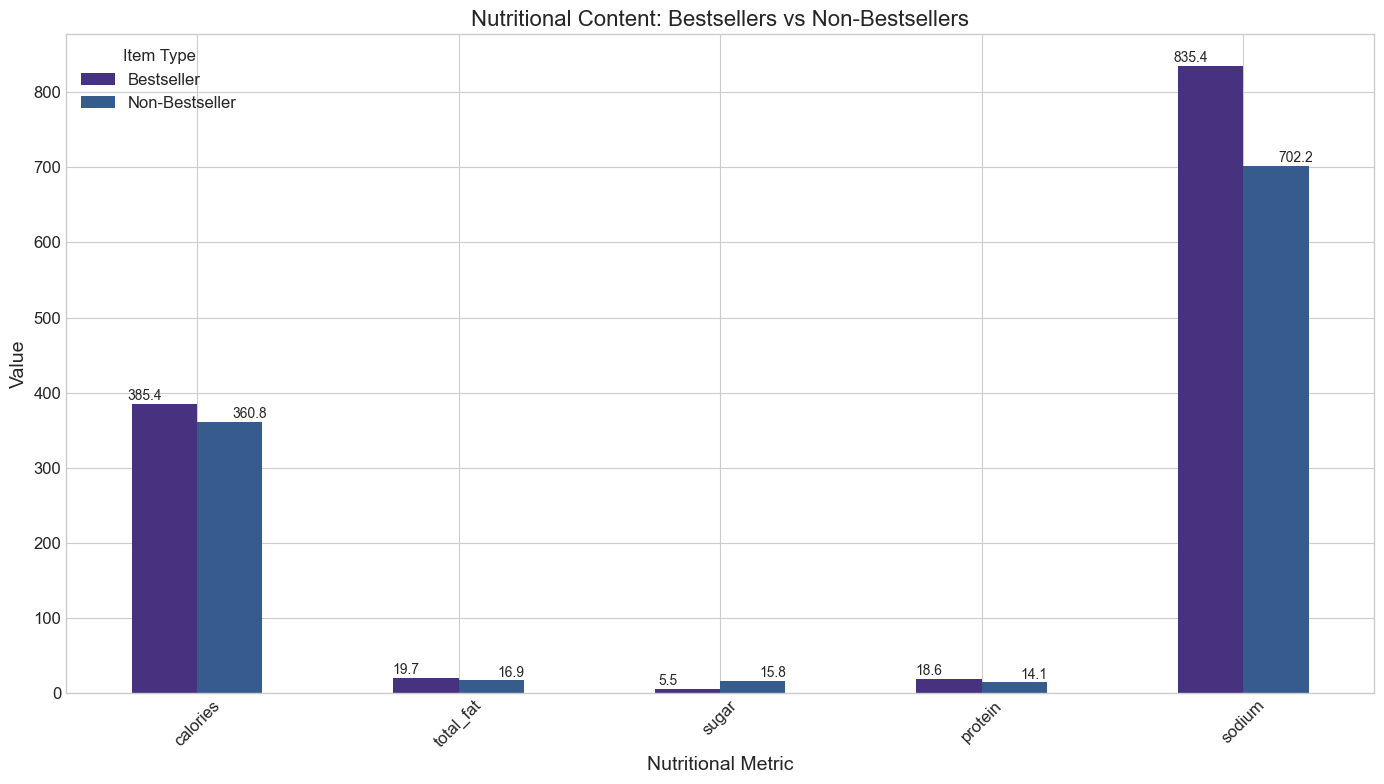

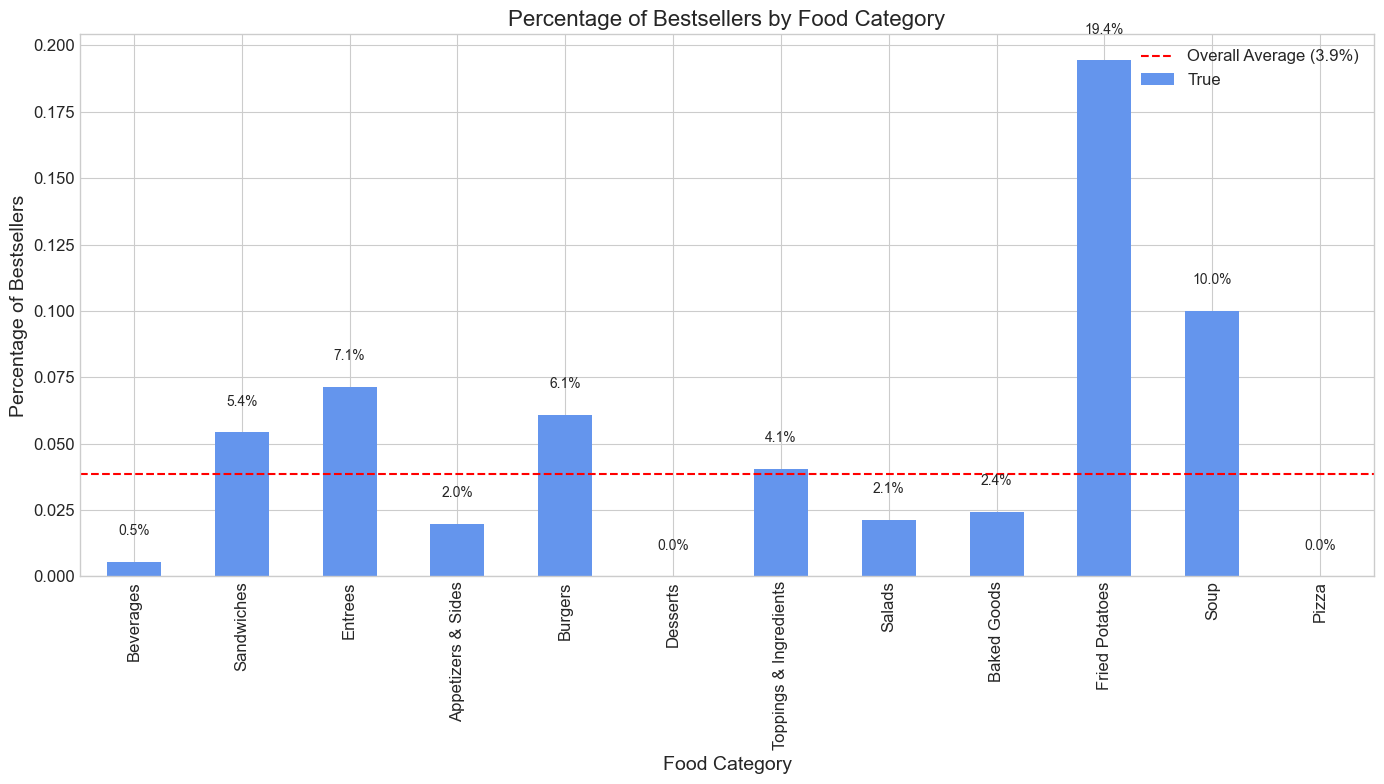

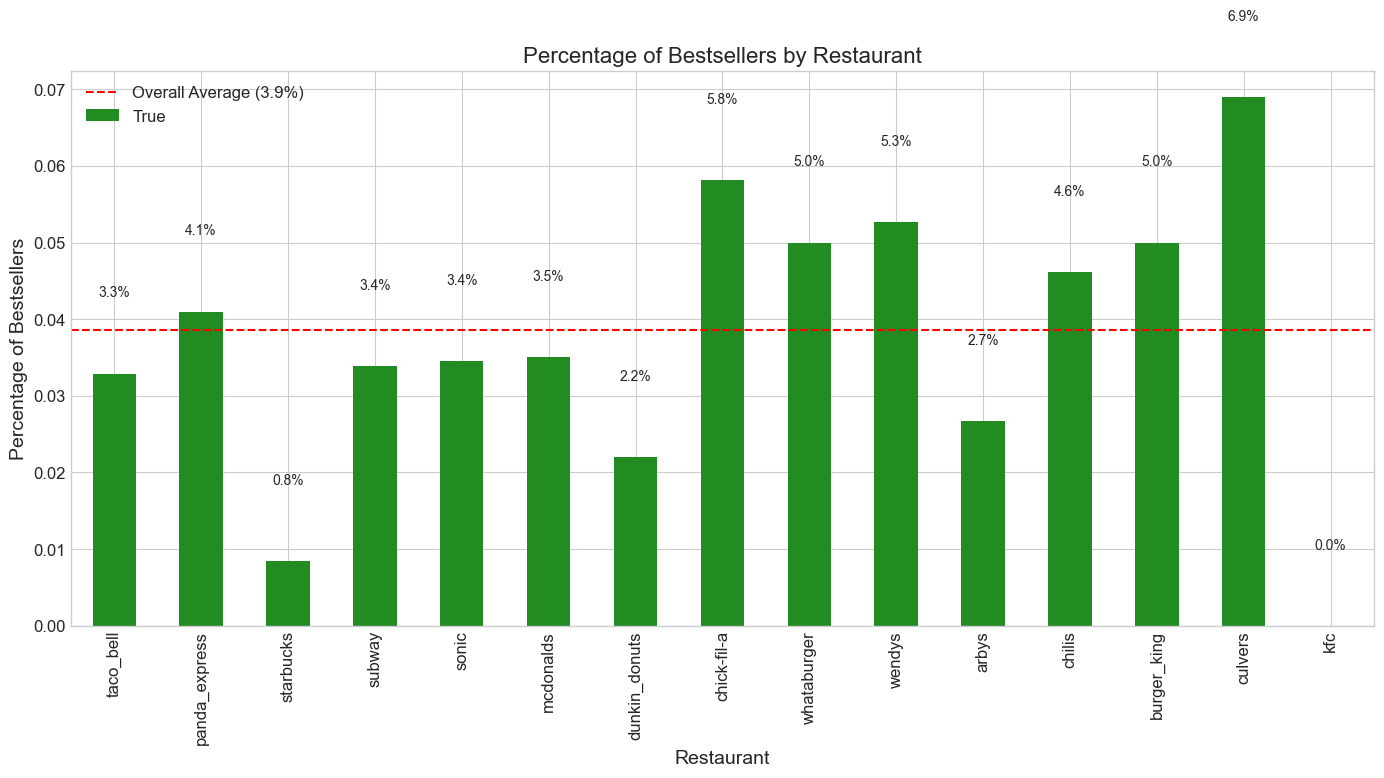


Correlation between Bestseller Status and Nutritional Content:
protein          0.058854
dietary_fiber    0.056374
sodium           0.035806
total_fat        0.031471
calories         0.017600
trans_fat        0.004643
cholesterol     -0.002396
saturated_fat   -0.023900
carbohydrates   -0.027040
sugar           -0.076923
dtype: float64


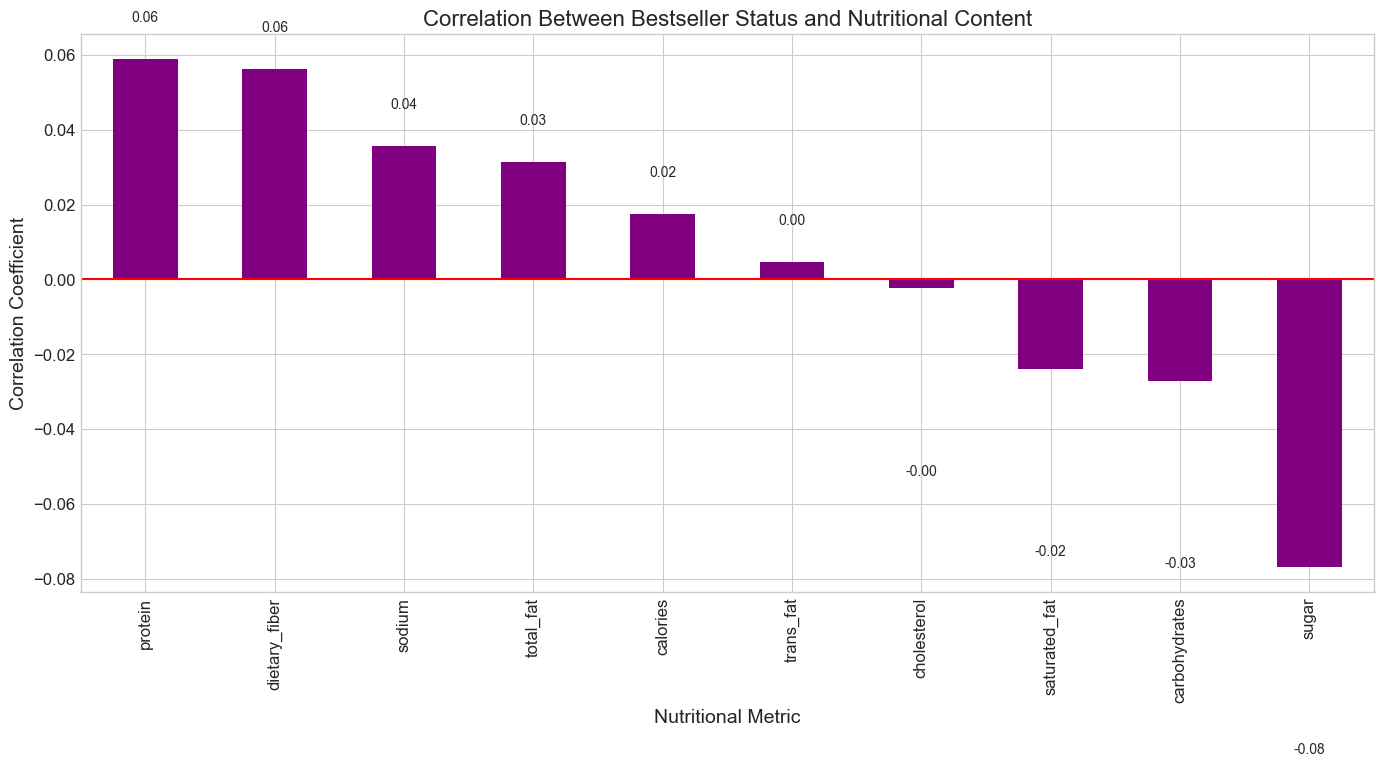

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')


# ========== PART 1: BESTSELLER EXPLORATORY ANALYSIS ==========

# 1. Compare nutritional profiles between bestsellers and non-bestsellers
print("\n--- Bestseller vs Non-Bestseller Nutritional Comparison ---")
bestseller_stats = df.groupby('bestseller')[numeric_cols].agg(['mean', 'median']).round(2)
print(bestseller_stats)

# Calculate percentage differences
# Different approach to extract mean values to avoid MultiIndex issues
bestseller_means = pd.DataFrame()
non_bestseller_means = pd.DataFrame()

for col in numeric_cols:
    if col in df.columns:
        bestseller_means[col] = [df[df['bestseller'] == True][col].mean()]
        non_bestseller_means[col] = [df[df['bestseller'] == False][col].mean()]

bestseller_means = bestseller_means.iloc[0]
non_bestseller_means = non_bestseller_means.iloc[0]

# Calculate percentage difference
pct_diff = ((bestseller_means - non_bestseller_means) / non_bestseller_means * 100).round(1)
print("\nPercentage Difference (Bestseller vs Non-Bestseller):")
print(pct_diff)

# 2. Visualize the differences using bar plots
plt.figure(figsize=(14, 10))

# Make sure we have data to plot
if len(numeric_cols) > 0 and True in df['bestseller'].unique() and False in df['bestseller'].unique():
    # Direct calculation of means for clearer code
    bestseller_data = {}
    non_bestseller_data = {}
    
    for col in numeric_cols:
        if col in df.columns:
            bestseller_data[col] = df[df['bestseller'] == True][col].mean()
            non_bestseller_data[col] = df[df['bestseller'] == False][col].mean()
    
    # Create the comparison dataframe
    comparison_df = pd.DataFrame({
        'Bestseller': bestseller_data,
        'Non-Bestseller': non_bestseller_data
    })
    
    # Select key nutritional metrics that exist in the data
    key_metrics = [col for col in ['calories', 'total_fat', 'sugar', 'protein', 'sodium'] 
                   if col in comparison_df.index]
    
    # Only proceed if we have metrics to plot
    if len(key_metrics) > 0:
        comparison_subset = comparison_df.loc[key_metrics]
        
        # Create a bar chart
        ax = comparison_subset.plot(kind='bar', figsize=(14, 8))
        plt.title('Nutritional Content: Bestsellers vs Non-Bestsellers', fontsize=16)
        plt.ylabel('Value', fontsize=14)
        plt.xlabel('Nutritional Metric', fontsize=14)
        plt.xticks(rotation=45)
        
        # Add value labels to the bars
        for i, col in enumerate(comparison_subset.columns):
            for j, value in enumerate(comparison_subset[col]):
                plt.text(j + (i-0.5)*0.4, value + 5, f'{value:.1f}', 
                         ha='center', fontsize=10)
        
        plt.legend(title='Item Type')
        plt.tight_layout()
        plt.show()
    else:
        print("No key metrics found in the data for visualization")
else:
    print("Not enough data to compare bestsellers vs non-bestsellers")


# 4. Distribution of bestsellers by food category
plt.figure(figsize=(14, 8))
category_bestseller = pd.crosstab(
    df['food_category'], 
    df['bestseller'],
    normalize='index'  # Normalize by row to get percentages
)

# Sort by bestseller percentage
category_bestseller = category_bestseller.sort_values(True, ascending=False)

# Filter to include only categories with at least 5 items
category_counts = df['food_category'].value_counts()
valid_categories = category_counts[category_counts >= 5].index
category_bestseller_filtered = category_bestseller.loc[valid_categories]

# Plot the top 15 categories with most bestsellers
top15_bestseller_categories = category_bestseller_filtered.head(15)
ax = top15_bestseller_categories[True].plot(
    kind='bar', 
    figsize=(14, 8),
    color='cornflowerblue'
)
plt.title('Percentage of Bestsellers by Food Category', fontsize=16)
plt.ylabel('Percentage of Bestsellers', fontsize=14)
plt.xlabel('Food Category', fontsize=14)
plt.xticks(rotation=90)
for i, v in enumerate(top15_bestseller_categories[True]):
    plt.text(i, v+0.01, f'{v:.1%}', ha='center', fontsize=10)
plt.axhline(df['bestseller'].mean(), color='red', linestyle='--', 
           label=f'Overall Average ({df["bestseller"].mean():.1%})')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Distribution of bestsellers by restaurant
plt.figure(figsize=(14, 8))
restaurant_bestseller = pd.crosstab(
    df['restaurant'], 
    df['bestseller'],
    normalize='index'  # Normalize by row to get percentages
)

# Sort by bestseller percentage
restaurant_bestseller = restaurant_bestseller.sort_values(True, ascending=False)

# Filter to include only restaurants with at least 10 items
restaurant_counts = df['restaurant'].value_counts()
valid_restaurants = restaurant_counts[restaurant_counts >= 10].index
restaurant_bestseller_filtered = restaurant_bestseller.loc[valid_restaurants]

# Plot the top 15 restaurants with most bestsellers
top15_bestseller_restaurants = restaurant_bestseller_filtered.head(15)
top15_bestseller_restaurants[True].plot(
    kind='bar', 
    figsize=(14, 8),
    color='forestgreen'
)
plt.title('Percentage of Bestsellers by Restaurant', fontsize=16)
plt.ylabel('Percentage of Bestsellers', fontsize=14)
plt.xlabel('Restaurant', fontsize=14)
plt.xticks(rotation=90)
for i, v in enumerate(top15_bestseller_restaurants[True]):
    plt.text(i, v+0.01, f'{v:.1%}', ha='center', fontsize=10)
plt.axhline(df['bestseller'].mean(), color='red', linestyle='--', 
           label=f'Overall Average ({df["bestseller"].mean():.1%})')
plt.legend()
plt.tight_layout()
plt.show()

# 6. Correlation between bestseller status and nutritional content
# Calculate point-biserial correlation (correlation between binary and continuous variables)
bestseller_corr = df.dropna(subset=numeric_cols + ['bestseller'])
bestseller_corrs = {}

for col in numeric_cols:
    if col in bestseller_corr.columns:
        corr = bestseller_corr['bestseller'].corr(bestseller_corr[col])
        bestseller_corrs[col] = corr

# Sort correlations
bestseller_corrs = pd.Series(bestseller_corrs).sort_values(ascending=False)
print("\nCorrelation between Bestseller Status and Nutritional Content:")
print(bestseller_corrs)

# Visualize correlations
plt.figure(figsize=(14, 8))
bestseller_corrs.plot(kind='bar', figsize=(14, 8), color='purple')
plt.title('Correlation Between Bestseller Status and Nutritional Content', fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Nutritional Metric', fontsize=14)
plt.axhline(0, color='red', linestyle='-')
plt.xticks(rotation=90)
for i, v in enumerate(bestseller_corrs):
    plt.text(i, v + (0.01 if v >= 0 else -0.05), f'{v:.2f}', ha='center', fontsize=10)
plt.tight_layout()

plt.show()

In [ ]:
# ========== PART 2: PREDICTIVE MODELING ==========

# Prepare features for modeling
model_df = df.dropna(subset=numeric_cols + ['bestseller'])

# 1. Feature preparation
X = model_df[numeric_cols]
y = model_df['bestseller']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Train a Random Forest model
print("\n--- Building Bestseller Prediction Model ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)

# 3. Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

# 4. Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Bestseller Prediction', fontsize=16)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.tight_layout()
plt.show()

# 5. Feature importance analysis
plt.figure(figsize=(14, 8))
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(14, 8), color='teal')
plt.title('Feature Importance for Bestseller Prediction', fontsize=16)
plt.ylabel('Importance Score', fontsize=14)
plt.xlabel('Nutritional Features', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 6. Analyze the probability distribution of bestsellers
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of being a bestseller

plt.figure(figsize=(12, 8))
plt.hist(y_prob[y_test == True], bins=20, alpha=0.5, label='True Bestsellers', color='green')
plt.hist(y_prob[y_test == False], bins=20, alpha=0.5, label='Non-Bestsellers', color='red')
plt.title('Distribution of Bestseller Probabilities', fontsize=16)
plt.xlabel('Probability of Being a Bestseller', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# ========== PART 3: BESTSELLER CHARACTERISTICS ANALYSIS ==========

# 1. Identify potential bestsellers (items with high predicted probability but not classified as bestsellers)
test_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_prob
})

potential_bestsellers = test_results[(test_results['Actual'] == False) & 
                                     (test_results['Probability'] > 0.7)]

print(f"\nNumber of Potential Bestsellers Identified: {len(potential_bestsellers)}")
if len(potential_bestsellers) > 0:
    potential_idx = potential_bestsellers.index
    potential_items = model_df.loc[potential_idx, ['restaurant', 'item', 'food_category'] + numeric_cols]
    print("\nTop 5 Potential Bestsellers:")
    print(potential_items.head())

# 2. Analyze item descriptions (if available)
if 'item_description' in df.columns:
    # Compare word count in bestsellers vs. non-bestsellers
    df['description_word_count'] = df['item_description'].str.split().str.len()
    
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='bestseller', y='description_word_count', data=df)
    plt.title('Description Word Count: Bestsellers vs. Non-Bestsellers', fontsize=16)
    plt.xlabel('Bestseller Status', fontsize=14)
    plt.ylabel('Word Count', fontsize=14)
    plt.tight_layout()
    plt.show()

# 3. Create a profile for the "ideal" bestseller
# Calculate the average nutritional profile of top bestsellers (highest probability)
top_bestsellers = test_results[test_results['Actual'] == True].sort_values('Probability', ascending=False)
top_idx = top_bestsellers.head(20).index
ideal_profile = model_df.loc[top_idx, numeric_cols].mean()

# Compare with average non-bestseller
non_bestseller_profile = model_df[model_df['bestseller'] == False][numeric_cols].mean()

# Create comparison table
comparison = pd.DataFrame({
    'Ideal Bestseller': ideal_profile,
    'Average Non-Bestseller': non_bestseller_profile,
    'Difference (%)': (ideal_profile - non_bestseller_profile) / non_bestseller_profile * 100
})

print("\nIdeal Bestseller Nutritional Profile:")
print(comparison.round(2))

# Visualize the ideal profile
plt.figure(figsize=(14, 8))
# Normalize for better visualization
normalized_profile = pd.DataFrame({
    'Ideal Bestseller': ideal_profile / ideal_profile.max(),
    'Average Non-Bestseller': non_bestseller_profile / non_bestseller_profile.max()
})

normalized_profile.plot(kind='bar', figsize=(14, 8))
plt.title('Normalized Nutritional Profile: Ideal Bestseller vs. Average Non-Bestseller', fontsize=16)
plt.ylabel('Normalized Value', fontsize=14)
plt.xlabel('Nutritional Metric', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Serving size analysis for bestsellers
if 'serving_size' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='bestseller', y='serving_size', data=df)
    plt.title('Serving Size: Bestsellers vs. Non-Bestsellers', fontsize=16)
    plt.xlabel('Bestseller Status', fontsize=14)
    plt.ylabel('Serving Size', fontsize=14)
    plt.tight_layout()
    plt.show()

# 5. Summary of key insights
print("\n=== BESTSELLER ANALYSIS INSIGHTS ===")
print("1. Key nutritional factors that influence bestseller status:")
for feature, importance in feature_importance.head(5).items():
    print(f"   - {feature}: {importance:.4f}")

print("\n2. Food categories with highest bestseller percentages:")
for category, value in top15_bestseller_categories.head(5).iterrows():
    print(f"   - {category}: {value[True]:.1%}")

print("\n3. Restaurants with highest bestseller percentages:")
for restaurant, value in top15_bestseller_restaurants.head(5).iterrows():
    print(f"   - {restaurant}: {value[True]:.1%}")

print("\n4. Nutritional differences between bestsellers and non-bestsellers:")
for metric, value in pct_diff.head(5).items():
    print(f"   - {metric}: {value:+.1f}%")

print("\n5. Bestseller prediction model accuracy:")
print("   - Accuracy: " + classification_report(y_test, y_pred).split('accuracy')[1].split('\n')[0].strip())